Далее будет использоваться датасет Thyroid_Diff  
https://archive.ics.uci.edu/dataset/915/differentiated+thyroid+cancer+recurrence

Что дальше?

Это начало лабораторной работы по Классификации.

Забираем любой датасет (кроме Iris, Wine, Abalon) по ссылке (внутри группы все датасеты должны быть разными):

 https://archive.ics.uci.edu/datasets?Task=Classification&skip=0&take=25&sort=desc&orderBy=NumHits&search=&Types=Tabular&Types=Text

  
1 часть
 1. Скачать один из наборов данных
 1. Загрузить данные в датафрейм
 1. Вывести статистическую информацию о наборе данных
 1. Вывести названия столбцов и строк
 1. Заменить категориальные данные количественными
 1. Визуализировать данные с помощью Matplotlib и Seaborn
   1. Должно быть не менее 2х визуализаций на каждый признак. Выберите самые красивые визуализации!
   1. Должно быть не менее 3х групповых визуализаций




In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

Данный датает содержит набор данных о пациентах, прошедших лечение рака щитовидной железы.  
Столбец **Recurred** говорит о том, произошел рецидив болезни или нет.
**Age** - Численное значение. Возраст пациента.  
**Gender** - Бинарное значение. Пол пациента.  
**Smoking** - Бинарное значение. Курит сейчас пациент или нет.    
**Hx Smoking** - Бинарное значение. Курил пациент в прошлом или нет.   
**Hx Radiothreapy**	- Бинарное значение. Проходил пациент радиотерапию или нет.   
**Adenopathy** - Бинарное значение. Имеется Аденопатия или нет (увеличение лимфатических узлов)  
**M** - Бинарное значение. M-стадия отражает наличие отдаленных метастазов. M0 означает, что нет признаков метастазирования, а M1 указывает на присутствие метастазов в отдаленных органах.
**Focality** - Бинарное значение. Фокальная опухоль означает, что рак локализован в одном месте, тогда как мультифокальный рак распространяется на несколько участков органа. Фокальность влияет на стратегию лечения и прогноз.  
**Thyroid Function** - Категориальные значения. Указывает на наличие и характер проблем с выработкой гормонов щитовидной железы  
**Physical Examination** - Категориальные значения. Это результат физического осмотра пациента врачом.   
**Pathology** - Категориальные значения. Указывает на характер паталогии щитовидной железы: Микропапиллярный рак, Папиллярная аденокарцинома, Фолликулярная карцинома, Карцинома из клеток Гюртле  
**Risk** - Категориальные значения. Оценка риска рецидива или прогрессирования заболевания. Низкий, средний и высокий соответственно.
**T** - Категориальные значения. T-стадия описывает размер и локализацию первичной опухоли. Стадии варьируются от T1 до T4, где T1 обозначает небольшую опухоль, ограниченную одним органом, а T4 — обширную опухоль, распространившуюся на соседние структуры.  
**N** - Категориальные значения. N-стадия указывает на наличие или отсутствие поражения региональных лимфатических узлов. N0 означает отсутствие метастазов в лимфатических узлах, а N1-N3 указывают на различную степень распространения рака на лимфатические узлы.
**Stage** - Категориальные значения. Общая оценка стадии рака, основанная на комбинации TNM-классификации. Эта классификация помогает определить степень распространения опухоли и выбрать наиболее подходящую тактику лечения.
**Response** - Категориальные значения. Показатель реакции организма на проводимое лечение. 


1-2. Загрузить данные в датафрейм

In [25]:
df = pd.read_csv('C:/Users/leous/.vscode/Data_Mining/content/Thyroid_Diff.csv')
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


3. Вывести статистическую информацию о наборе данных

In [26]:
df.describe()

,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


4. Вывести названия столбцов и строк

In [27]:
df.columns

Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')

5. Заменить категориальные данные количественными

In [28]:
mapping = {}
for col in df.columns:
    if df[col].unique().size == 2:
        t, f = df[col].unique()[0], df[col].unique()[1]
        mapping[col] = {True : t, False : f}
        df[col] = df[col].map({t: True, f: False})
    else:
        print(col, df[col].unique())
df.head()

Age [27 34 30 62 52 41 46 51 40 75 59 49 50 76 42 44 43 36 70 60 33 26 37 55
 31 45 20 38 29 25 21 23 24 35 54 22 69 28 17 73 18 39 57 66 32 47 56 63
 19 67 72 61 68 48 81 53 58 80 79 65 15 82 71 64 78]
Thyroid Function ['Euthyroid' 'Clinical Hyperthyroidism' 'Clinical Hypothyroidism'
 'Subclinical Hyperthyroidism' 'Subclinical Hypothyroidism']
Physical Examination ['Single nodular goiter-left' 'Multinodular goiter'
 'Single nodular goiter-right' 'Normal' 'Diffuse goiter']
Adenopathy ['No' 'Right' 'Extensive' 'Left' 'Bilateral' 'Posterior']
Pathology ['Micropapillary' 'Papillary' 'Follicular' 'Hurthel cell']
Risk ['Low' 'Intermediate' 'High']
T ['T1a' 'T1b' 'T2' 'T3a' 'T3b' 'T4a' 'T4b']
N ['N0' 'N1b' 'N1a']
Stage ['I' 'II' 'IVB' 'III' 'IVA']
Response ['Indeterminate' 'Excellent' 'Structural Incomplete'
 'Biochemical Incomplete']


,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,True,True,True,True,Euthyroid,Single nodular goiter-left,No,Micropapillary,True,Low,T1a,N0,True,I,Indeterminate,True
1,34,True,True,False,True,Euthyroid,Multinodular goiter,No,Micropapillary,True,Low,T1a,N0,True,I,Excellent,True
2,30,True,True,True,True,Euthyroid,Single nodular goiter-right,No,Micropapillary,True,Low,T1a,N0,True,I,Excellent,True
3,62,True,True,True,True,Euthyroid,Single nodular goiter-right,No,Micropapillary,True,Low,T1a,N0,True,I,Excellent,True
4,62,True,True,True,True,Euthyroid,Multinodular goiter,No,Micropapillary,False,Low,T1a,N0,True,I,Excellent,True


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    bool  
 2   Smoking               383 non-null    bool  
 3   Hx Smoking            383 non-null    bool  
 4   Hx Radiothreapy       383 non-null    bool  
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    bool  
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    bool  
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

Остальные признаки заменить на количественные не представляется возможным

In [30]:
mas_int = df.select_dtypes(include=['int64']).columns
mas_bool = df.select_dtypes(include=['bool']).columns
mas_others = df.select_dtypes(exclude=['int64','bool']).columns

6. Визуализировать данные с помощью Matplotlib и Seaborn

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

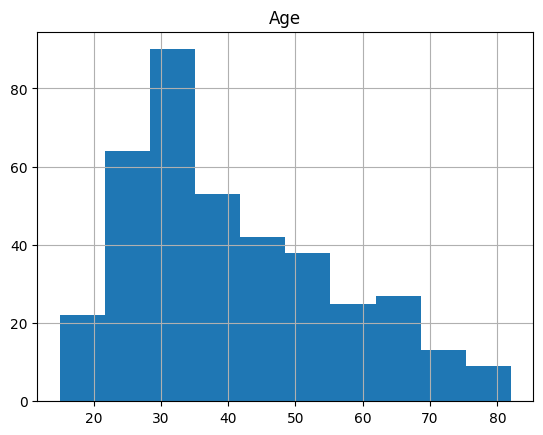

In [31]:
df[mas_int].hist()

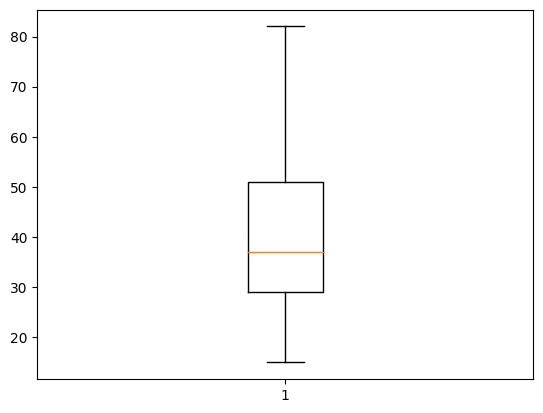

In [32]:
plt.boxplot(df[mas_int])
plt.show()

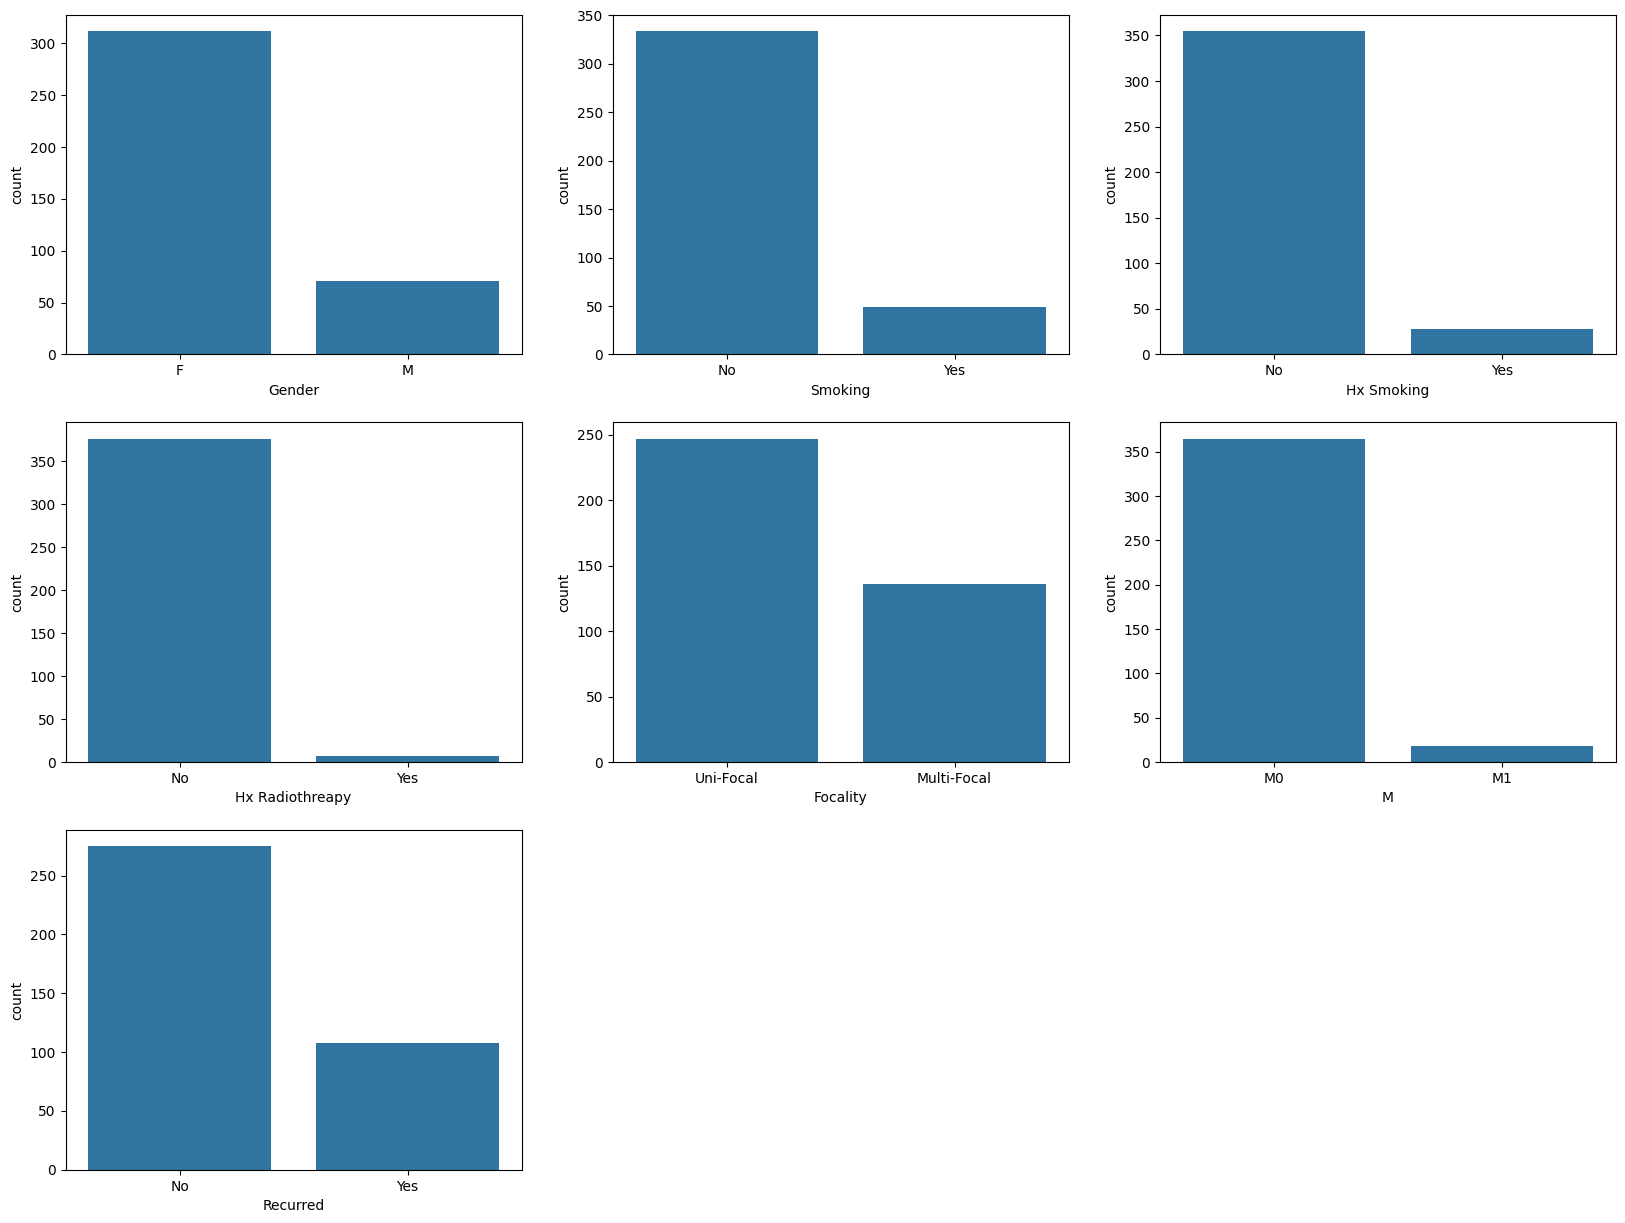

In [33]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))

for col in enumerate(mas_bool):
    sns.countplot(data=df.replace(mapping[col[1]]), x=col[1], ax= axes[col[0] // 3, col[0] % 3]);
axes[2][1].set_visible(False)
axes[2][2].set_visible(False)
plt.show()

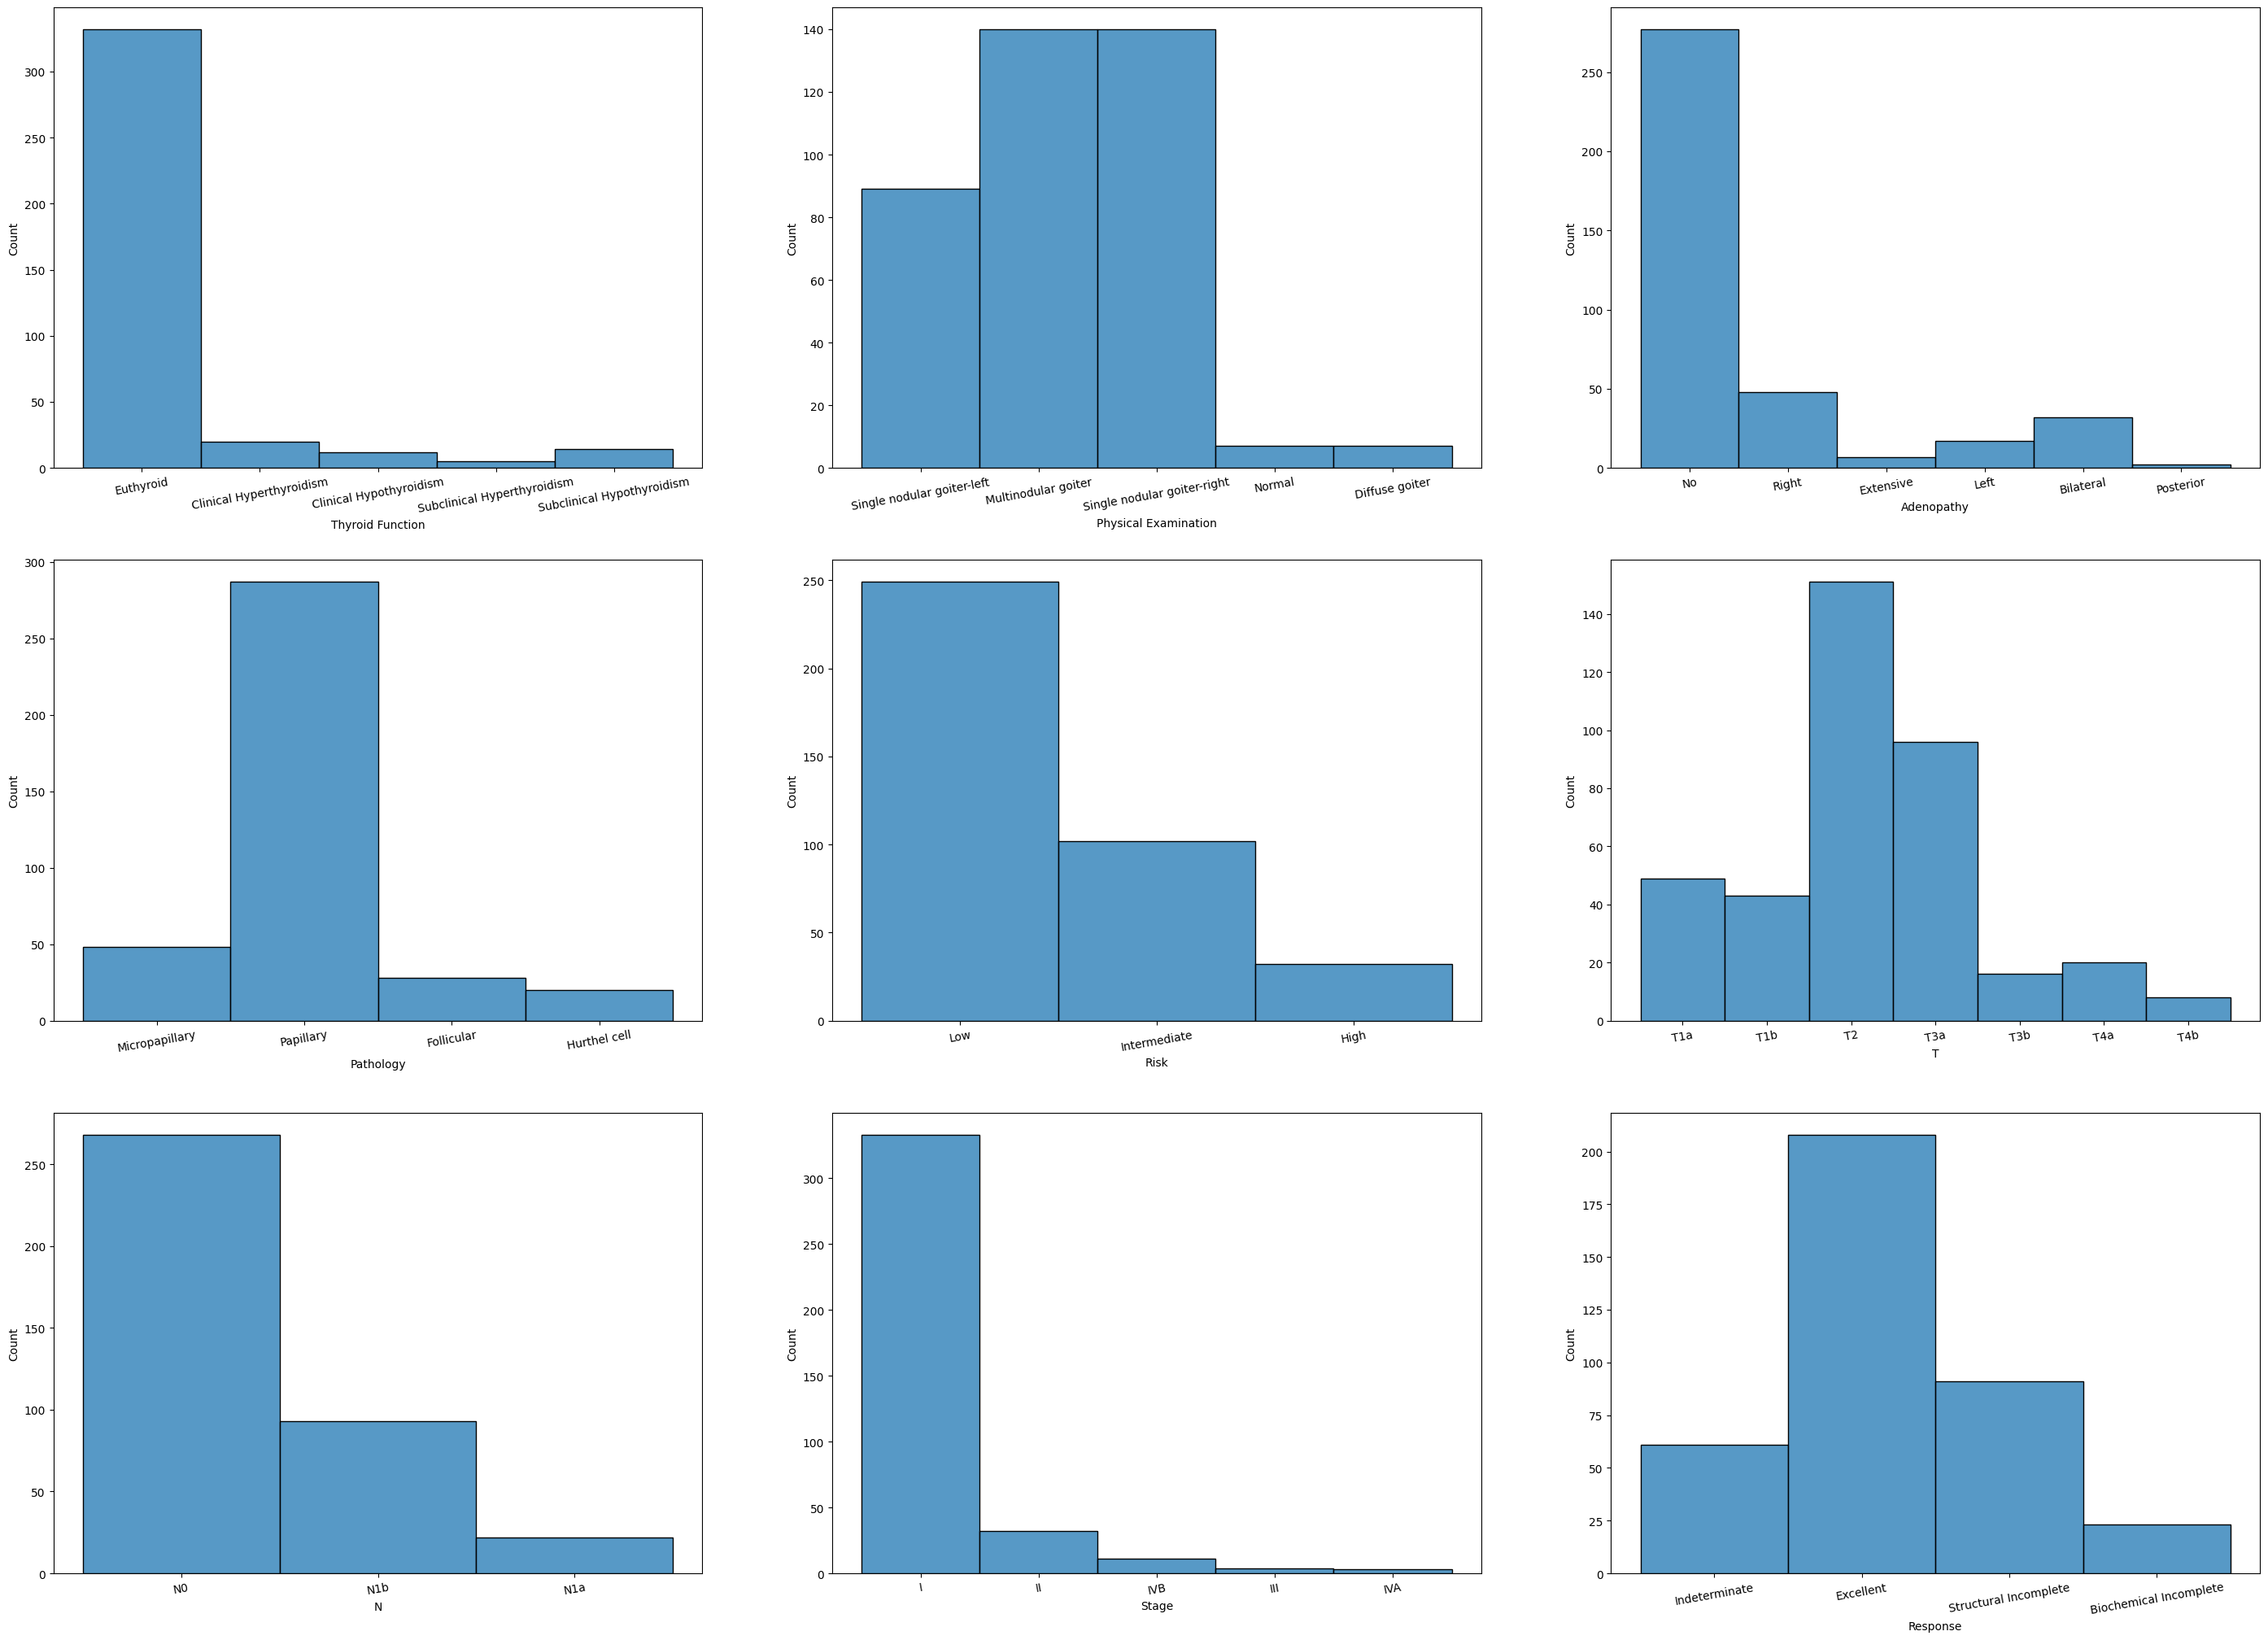

In [34]:
from matplotlib.ticker import FixedLocator, FixedFormatter
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(35, 25))

for col in enumerate(mas_others):
    ax= axes[col[0] // 3, col[0] % 3]
    sns.histplot(data=df, x=col[1], ax = ax)
    tick_labels = ax.get_xticklabels()

    locator = FixedLocator(range(len(tick_labels)))
    formatter = FixedFormatter([label.get_text() for label in tick_labels])

    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=10)
plt.show()

In [35]:
mas_others

Index(['Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Risk', 'T', 'N', 'Stage', 'Response'],
      dtype='object')

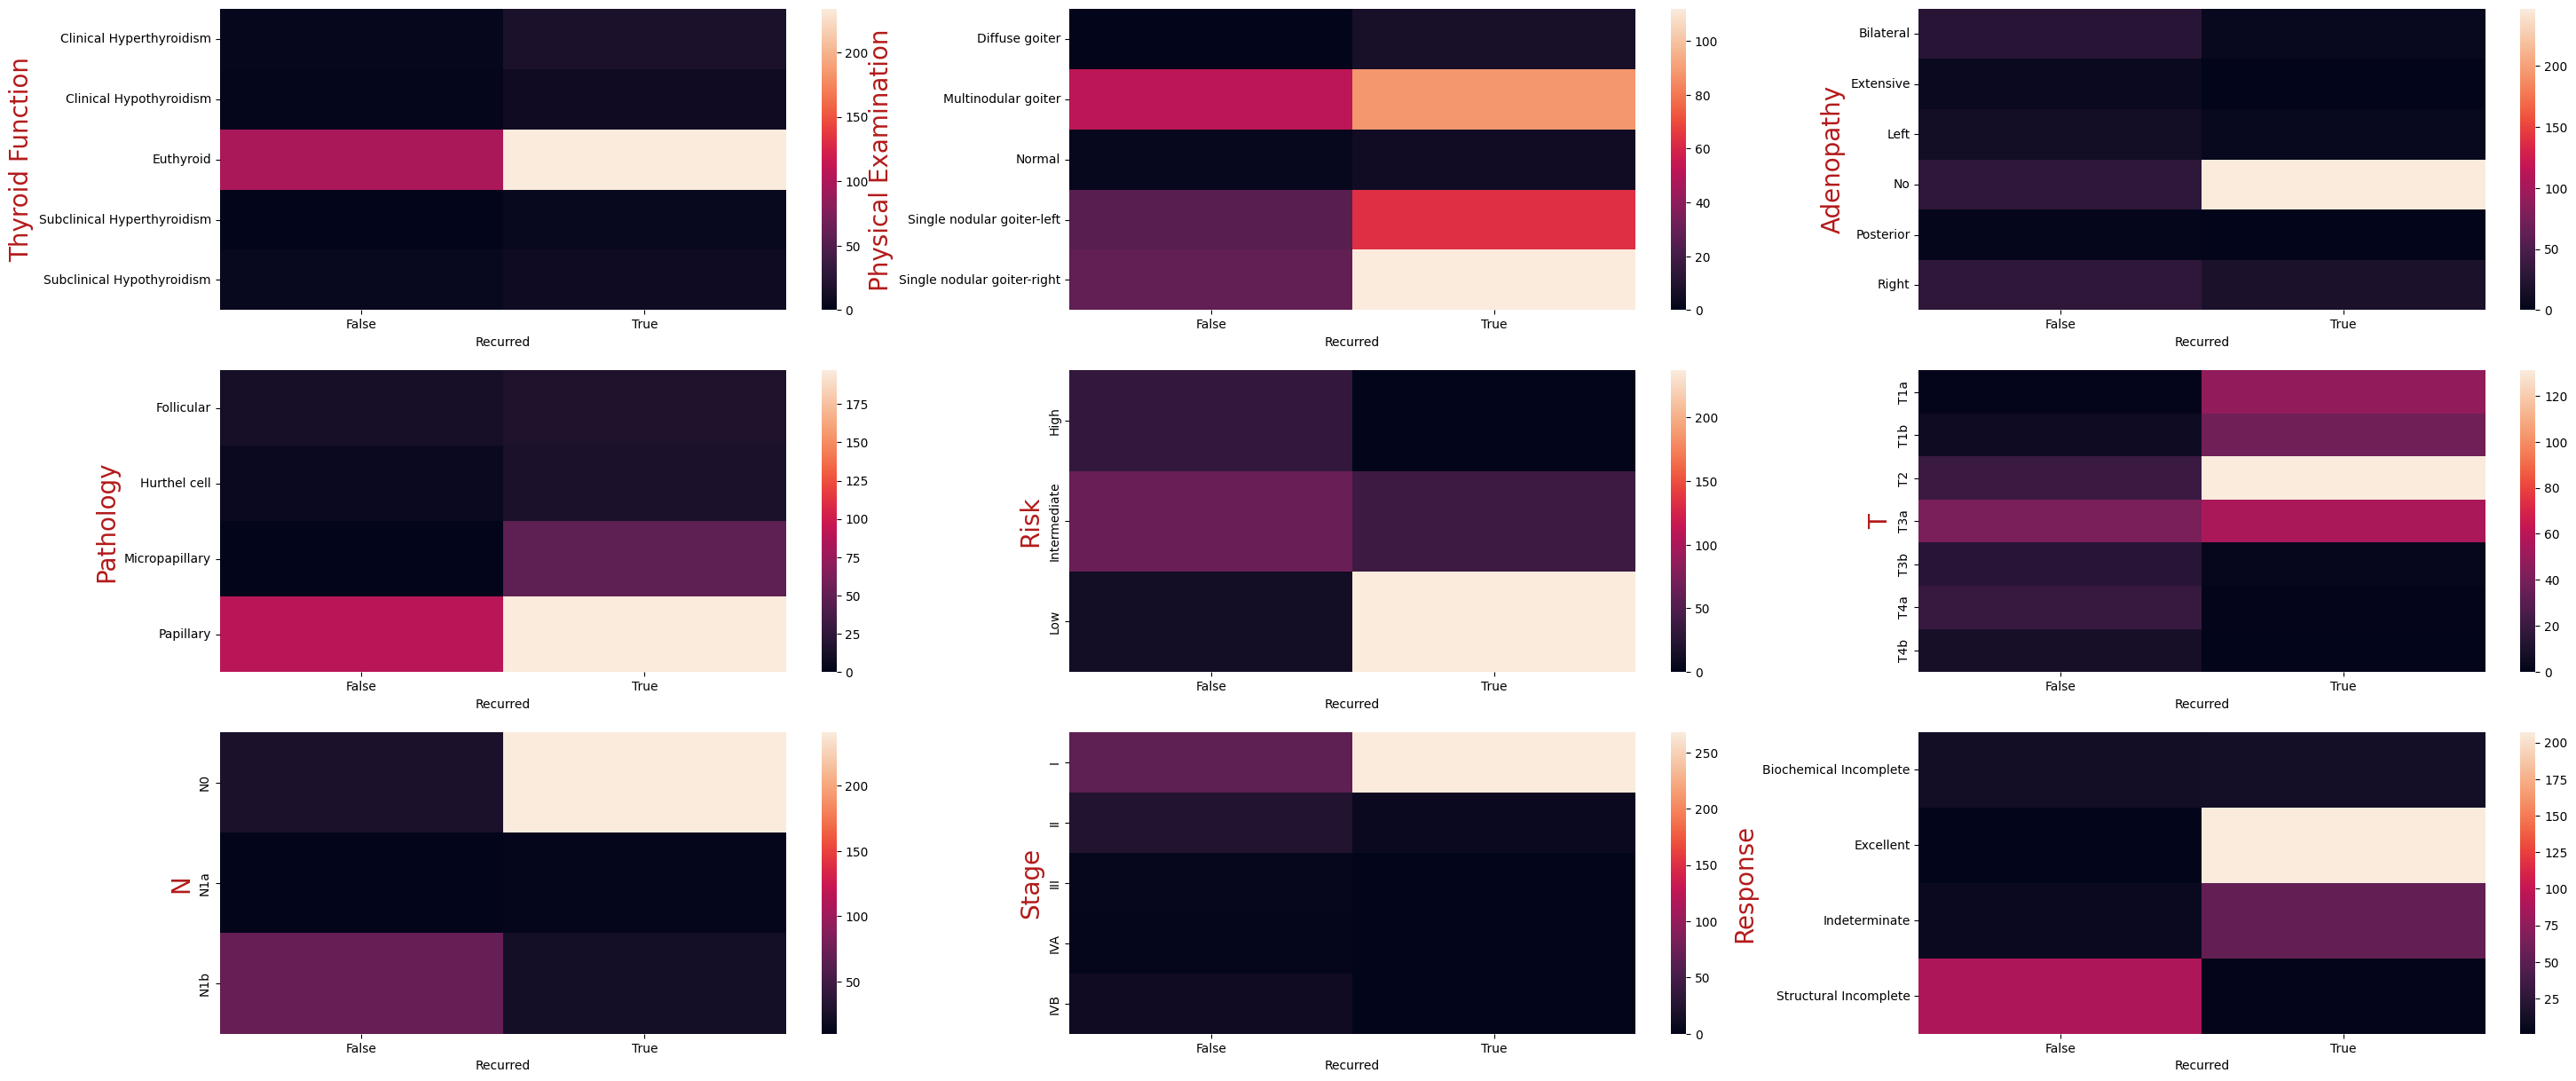

In [36]:
# sns.heatmap(pd.crosstab(df[mas_others[0]], df['Recurred']))

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(35, 15))
for col in enumerate(mas_others):
    ax= axes[col[0] // 3, col[0] % 3]
    sns.heatmap(pd.crosstab(df[col[1]], df['Recurred']), ax=ax)
    # tick_labels = ax.get_xticklabels()

    locator = FixedLocator(range(len(tick_labels)))
    # formatter = FixedFormatter([label.get_text() for label in tick_labels])

    # ax.xaxis.set_major_locator(locator)
    # ax.xaxis.set_major_formatter(formatter)
    # ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
    ax.set_ylabel(ax.get_ylabel(), fontsize=20, color=(0.7,0.1,0.1))
plt.show()

Сейчас представлены:  
2 графика на численный параметр (гистограмма и "коробка")  
По одному графику распределения бинарных и категориальных параметров  
На последнем графике представлена тепловая карта, отображающая зависимость целевой бинарной переменной от категориальных. Уже по ним можно делать предположения о том, какие параметры коррелируют слишком сильно, чтобы использовать их в обычных задачах классификации

# Практика 2


In [37]:
df

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,True,True,True,True,Euthyroid,Single nodular goiter-left,No,Micropapillary,True,Low,T1a,N0,True,I,Indeterminate,True
1,34,True,True,False,True,Euthyroid,Multinodular goiter,No,Micropapillary,True,Low,T1a,N0,True,I,Excellent,True
2,30,True,True,True,True,Euthyroid,Single nodular goiter-right,No,Micropapillary,True,Low,T1a,N0,True,I,Excellent,True
3,62,True,True,True,True,Euthyroid,Single nodular goiter-right,No,Micropapillary,True,Low,T1a,N0,True,I,Excellent,True
4,62,True,True,True,True,Euthyroid,Multinodular goiter,No,Micropapillary,False,Low,T1a,N0,True,I,Excellent,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,False,False,False,False,Euthyroid,Single nodular goiter-right,Right,Papillary,True,High,T4b,N1b,False,IVB,Biochemical Incomplete,False
379,81,False,False,True,False,Euthyroid,Multinodular goiter,Extensive,Papillary,False,High,T4b,N1b,False,IVB,Structural Incomplete,False
380,72,False,False,False,True,Euthyroid,Multinodular goiter,Bilateral,Papillary,False,High,T4b,N1b,False,IVB,Structural Incomplete,False
381,61,False,False,False,False,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,False,High,T4b,N1b,True,IVA,Structural Incomplete,False


In [38]:
X = df.drop(['Recurred'], axis=1)
y = df['Recurred']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (383, 16) | y shape: (383,) 


In [39]:
import scipy.stats as stats

# почему важно перемешивать и делать train и test статистически не различимыми по целевой переменной
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)

stats.ttest_ind (a=y_train, b=y_test)

TtestResult(statistic=-0.48418976206290276, pvalue=0.6285294028428743, df=381.0)

In [40]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline

In [41]:

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), mas_others)
    ],
    remainder='passthrough'
)

# Создаем список моделей
models = [
    ('LR', LogisticRegression(solver='lbfgs', max_iter=1000)),
    ('LDA', LinearDiscriminantAnalysis()),
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier()),
    ('NB', GaussianNB()),
    ('SVC', SVC(gamma='auto'))
]

# Оценка моделей через кросс-валидацию
results = []
model_names = []
for name, model in models:
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(pipeline, X, y, cv=kfold, scoring='accuracy')
    
    results.append(cv_results)
    model_names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.963563 (0.030932)
LDA: 0.950607 (0.035306)
KNN: 0.880027 (0.055695)
CART: 0.921727 (0.030812)
NB: 0.947841 (0.030861)
SVC: 0.919163 (0.046895)


Лучше всего себя показали Логистическая регрессия, LDA и Гауссово-наивный байесовский метод. Дальше будем работать последним

In [42]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('GaussianNB', GaussianNB())
])

# Обучение модели на обучающих данных
pipeline.fit(X_train, y_train)

# Прогнозирование результатов на тестовых данных
lr_pred_res = pipeline.predict(X_test)

# Расчет точности модели
lr_accuracy = accuracy_score(y_test, lr_pred_res)

print(f'GaussianNB accuracy: {lr_accuracy}')
print(f'GaussianNB prediction: {lr_pred_res}')

GaussianNB accuracy: 0.935064935064935
GaussianNB prediction: [False  True  True  True  True  True  True  True  True False False False
  True  True False  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True False False  True  True
  True  True  True  True  True False  True  True  True False  True  True
  True False False False  True  True  True  True  True  True  True False
  True False  True  True  True  True  True  True  True False  True  True
  True  True False  True  True]


In [43]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Находим индексы категориальных столбцов
X2_train = X_train.copy()
cat_cols = (X2_train.dtypes == 'object')

# Создаем преобразователь для категориальных данных
ord_enc = OrdinalEncoder()

# Применяем преобразователь к категориальным данным
X2_train[X2_train.columns[cat_cols]] = ord_enc.fit_transform(X2_train[X2_train.columns[cat_cols]])

# # Создаем пайплайн для нормализации и применения PCA
pipe = Pipeline([('scale', StandardScaler()), ('pca', PCA(n_components=2))])

# # Применяем пайплайн к данным
X2_train[['PC1', 'PC2']] = pipe.fit_transform(X2_train)

<Axes: title={'center': 'GaussianNB surface with original features'}>

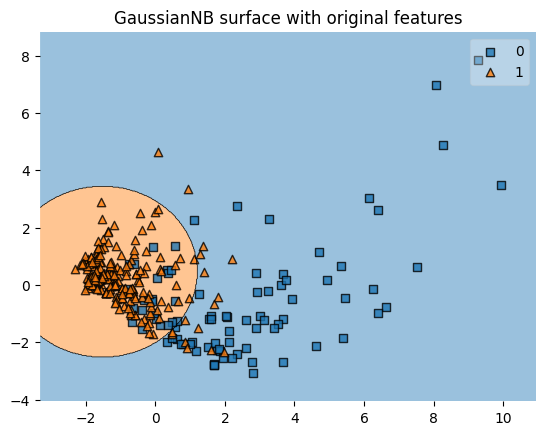

In [44]:
from mlxtend.plotting import plot_decision_regions

# Создадим целевой вектор y_2d
# Преобразуем классы к классам 0, 1, 2 соответственно
#y_s = y_train.map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
y_s = y_train

X_2d= X2_train[['PC1', 'PC2']].values

y_2d = y_s.astype(np.int_).values


sk_lda1 = GaussianNB()
sk_lda1.fit(X_2d, y_2d)

plt.title('GaussianNB surface with original features')
plot_decision_regions(
    	X=X_2d,
    	y=y_2d,
    	clf=sk_lda1)

In [45]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('GaussianNB', GaussianNB())
])

# Обучение модели на обучающих данных
pipeline.fit(X_train, y_train)

predicted = pipeline.predict(X_test)

In [46]:
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

## Accuray e AUC
'''
Теперь смотрим метрики.
НА ТЕСТОВОМ ДАТАСЕТЕ
'''
accuracy = metrics.accuracy_score(y_test, predicted)#Оценим точность классификации.

'''
Получим результат
'''

## Precision e Recall
recall = metrics.recall_score(y_test, predicted, average="weighted")
precision = metrics.precision_score(y_test, predicted, average="weighted")
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Detail:")
print(metrics.classification_report(y_test, predicted, target_names=[str(i) for i in np.unique(y_test)]))

Recall (all 1s predicted right): 0.94
Precision (confidence when predicting a 1): 0.94
Detail:
              precision    recall  f1-score   support

       False       0.94      0.80      0.86        20
        True       0.93      0.98      0.96        57

    accuracy                           0.94        77
   macro avg       0.94      0.89      0.91        77
weighted avg       0.94      0.94      0.93        77

